# <span style="color:orange">Atomic Spectroscopy</span>
Project-based laboratory exercise in the course Atomic and Nuclear Physics with Applications (FYSB24)
### Names: Jaida Raffelsberger and Chris Mkolongo
## Table of Content
 [Introduction](#Introduction)
* [1.The spectrum of Hydrogen](#Hydrogen)
  * [1.1 Open the spectrum](#Hydrogen_Step_1)
  * [1.2 Gaussian fit](#Hydrogen_Step_2)
  * [1.3 Calculate Rydberg constant](#Hydrogen_Step_3)
  * [1.4 Discussion](#Hydrogen_Step_4)
* [2.The quantum defect](#quantum_defect)
  * [2.1 Open the Na spectrum](#quantum_1)  
  * [2.2 Open a saturated spectrum](#quantum_2) 
  * [2.3 Calculate experimental values for the quantum defect](#quantum_3) 
  * [2.4 Calculate the vacuum wavelength for the 3p – 8d transition](#quantum_4)  
  * [2.4 Discussion](#quantum_5)  
* [3.Fine structure](#fine_structure)  
  * [3.1 Open file and identify peaks](#fine_structure_1)  
  * [3.2 Conduct the analysis](#fine_structure_2)    
  * [3.2 Discussion](#fine_structure_3)
--------------------------------------------------------------------------------------------------------------

## Introduction <a name="Introduction"></a>
This Jupyter Notebook is meant to conduct the anaylsis as well as to present the results of the atomic spectroscopy lab. Generally all code provided is a guideline in order to get your analysis started. In case you want to use your own methods, feel free to change as much of the code as  you like. Each of the three tasks starts with the analysis of the data, followed by some calculations and ends with a discussion. The first task provides a lot of the code needed, whereas in the last part most of the coding is up to you. To get you started you can work through the [Introduction Jupyter Notebook on Canvas](https://canvas.education.lu.se/courses/13958/pages/getting-started-with-jupyter-notebook?module_item_id=409993).
Analogue to the this you need to import the modules needed.
<br>

**You have to import the following modules in order to run the code:**



In [1]:
# TODO : remove .py files from the repo that are not explicitly used here!
# Packages to access files in the system
import statistics
import sys, os

# Package that supports mathmatical operations on arrays
import numpy as np

# Package that supports operations for data structures and numeric tables
import pandas as pd

# Package for plotting; 
# first line makes plots interactive, 
# second actually loads the library
from sympy.physics import hydrogen
%matplotlib notebook
import matplotlib.pyplot as plt
import statistics

# Function that fits a curve to data 
from scipy.optimize import curve_fit

sys.path.append('./lib')
from lib import fittingFunctions

--------------------------------------------------------------------------------------------------------------

# <span style="color:orange">1. The spectrum of Hydrogen</span> <a name="Hydrogen"></a>
## 1.1 The spectrum of Hydrogen<a name="Hydrogen_Step_1"></a>
With the function  `read ` from package  `pandas ` one can read the experimental data. To do this, you have to specify the data path and file name accordinlgy in the field below. Please mind that the **absolute path** must be specified with `/` instead of `\`.

<IPython.core.display.Javascript object>


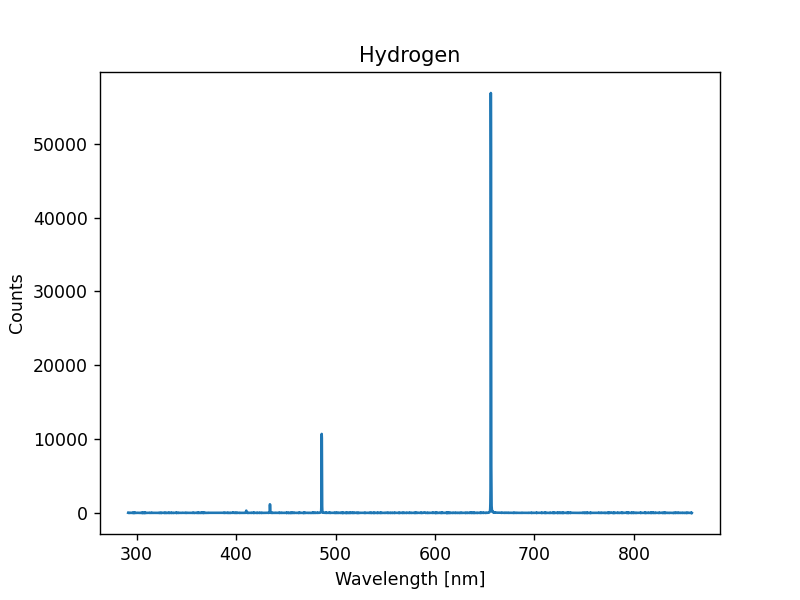

Text(0, 0.5, 'Counts')

In [3]:
# Specify the absolute path for the hydrogen spectrum inside quotation marks:
df = pd.read_csv("C:/Users/LENOVO/PycharmProjects/scientific_computations/files/Hydrogen spectrum.txt",
                 sep=";",  # Here we specify that values are seperated by semicolons.
                 header=0,  # This skips the first rows of the file containing information about the acquisiton settings

                 # Check if your spectrum txt file contains of 4 or 5 coulumns. If you have 5 coulumns use the adapted 'names'-array the line below.
                 names=["Wave", "Sample", "Dark", "Reference"])
# names=["Wavelength", "Count sample", "Background", "Reference", "Corrected for dark"])

# df = df.stack().str.replace(',','.').unstack() # Turns the  ',' in the data frame to a point
data = df.to_numpy()  #Converts the data frame into an Numpy array
wavelength = np.array(list(data[:, 0]),
                      dtype=float)  # Turns the Numpy 2d array with the wavelenghts in a regular 2D float array
counts = np.array(list(data[:, 1]),
                  dtype=float)  # If you have saved 5 coulumns, use the 'Corrected for dark values' by changing the '1' to a '4'.

plt.figure()
plt.plot(wavelength, counts)
plt.show()
plt.title("Hydrogen")  # set title of the plot
plt.xlabel("Wavelength [nm]")  # set label for x-axis
plt.ylabel("Counts")  # set label for Y-axis

## 1.2 Gaussian fit<a name="Hydrogen_Step_2"></a>
Perform a Gaussian fit on the peaks in order to exactly determine the position of the peaks. You have to specify the region in which the Gaussian fit shall be performed. Adapt the other parameters (mu_guess, A_guess and sigma_guess) or delete them to successfuly run the fit. 

<IPython.core.display.Javascript object>


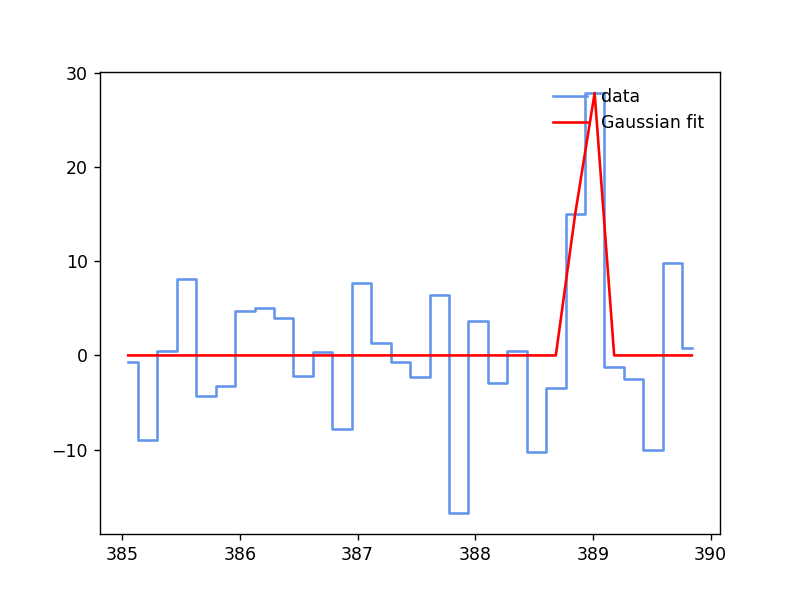

Estimated parameters:
 A = 118.55564, mu = 388.93979,  sigma = 0.04421 

Uncertainties in the estimated parameters: 
 σ²(A) = 4364752749983.19238, σ²(mu) = 5662.22545, σ²(sigma) = 51831.67818 

Covariance matrix: 
 [[ 4.36475275e+12 -1.57207551e+08 -4.75639002e+08]
 [-1.57207551e+08  5.66222545e+03  1.71313352e+04]
 [-4.75639002e+08  1.71313352e+04  5.18316782e+04]]


In [4]:
peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength,
                                              y=counts,
                                              region_start=385,  # bins where to start fitting
                                              region_stop=390,  # bins where to stop fitting
                                              mu_guess=388,  # guess for the position of peak centroid
                                              A_guess=60000,  # guess for the amplitude of the peak
                                              sigma_guess=1)  # guess for the sigma

Extract the peak position `mu`. Repeat the fit for all the peaks that you found and insert the wavelength in the table below. Identify the transition using the NIST data base. Adapt the table length if you find more than five lines in the spectrum.

In [5]:
# -> TODO <- insert the extracted wavelength here. Add numbers by seperating them with ',' to the previous value.
hydrogen_wavelength = np.array([656.23, 486.16, 434.09, 410.23, 397.06, 388.94])
# -> TODO <- compare the number with the nist database and identify the transition. Add names by seperating them with ';' to the previous value.
hydrogen_transistions = (["2 - 3", "2 - 4", "2 - 5", "2 - 6", "2 - 7", "2 - 8"])

# Nothing to change below here:
pd.DataFrame([hydrogen_transistions, hydrogen_wavelength], columns=['1', '2', '3', '4', '5', '6'],
             index=['Transition', 'Wavelength'])

,1,2,3,4,5,6
Transition,2 - 3,2 - 4,2 - 5,2 - 6,2 - 7,2 - 8
Wavelength,656.23,486.16,434.09,410.23,397.06,388.94


## 1.3 Calculate Rydberg constant<a name="Hydrogen_Step_3"></a>


Use your extracted data to determine an experimental value for the [Rydberg constant](https://en.wikipedia.org/wiki/Rydberg_constant) of hydrogen using the following formula:
<br>
$\frac{1}{\lambda_{0}}=R_{H}\left(\frac{1}{n_{1}^{2}}-\frac{1}{n_{2}^{2}}\right)$
<br>
where  $n_{1}$ and $n_{2}$ are two consecutive quantum numbers. Use the empty code box below to write your own code to extract the Rydberg constant.

In [6]:
## Write your code here to determine the Rydberg constant
def ryd_const(n1, n2, wavelength):
    return 1 / (wavelength * 1e-9) * 1 / (1 / n1 ** 2 - 1 / n2 ** 2)

rydberg = []
for i in range(6):
    ryd = ryd_const(2, i + 3, hydrogen_wavelength[i])
    print(f"For n={i + 3} to n=2, Rydberg constant =", ryd, "m^-1")
    rydberg.append(ryd)
print("Average Rydberg constant =", statistics.fmean(rydberg), "m$^{-1}$")

For n=3 to n=2, Rydberg constant = 10971762.948966064 m^-1
For n=4 to n=2, Rydberg constant = 10970325.27014426 m^-1
For n=5 to n=2, Rydberg constant = 10969855.932882033 m^-1
For n=6 to n=2, Rydberg constant = 10969456.158740217 m^-1
For n=7 to n=2, Rydberg constant = 10969514.822836738 m^-1
For n=8 to n=2, Rydberg constant = 10969986.801734628 m^-1
Average Rydberg constant = 10970150.322550656 m$^{-1}$


## 1.4 Discussion <a name="Hydrogen_Step_4"></a>
Discuss your results, describe the procedure used for the experimental determination of the Rydberg constant and compare the experimental value for the Rydberg constant with the value from literature in a brief text below:

The hydrogen spectra seen in the first Figure were collected by first heating up the spectral lamp to excite the electrons and promote transitions between energy levels, and then record the emission spectrum using Avasoft software which resulted in Figures of counts vs wavelength. From this and the NIST database we are able to deduce which peak at a particular point corresponds to a transition between a hydrogen energy level as seen in the Table in $1.2$ above, which displays the wavelengths of the Balmer series.

Using Rydbergs formula, we could thus insert our known values and solve for the Rydberg constant of hydrogen, displayed as outputs above and compare to the true value which is $10967758$ m$^{-1}$. As we can observe, the closest experimental value to the theoretical value is that of the transition between the highest energy level $n=8$ and $n=2$, which resulted in $10969986$ m$^{-1}$, while the average of our experimental values was $10970150$ m$^{-1}$, which has percentage error of $0.022\%$.

To improve results and reduce background noise a greater range of wavelength (more transitions) could have been observed by use of more sensitive apparatus (resulting in more significant figures) or greater saturation and integration time. Approximating the gaussian fit would have also led to a notable influence on the results, and fitting the peaks as accurately and as precise as possible from the start would have improved our estimation of the constant greatly.

--------------------------------------------------------------------------------------------------------------
# <span style="color:orange">2. The quantum defect</span> <a name="quantum_defect"></a>
Since sodium has a very intense feature, we are going to record two spectra with different integration time. The unsaturated spectrum gives us this intense line. The saturated spectrum will give us the weaker features.
## 2.1 Open the full, unsaturated sodium spectrum <a name="quantum_1"></a>
Identify as many sodium transitions corresponding to the different spectral lines, for which n=3 is the lower energy level, as possible. Use the Gaussian fit below and enter the values in the provided table further down.

<IPython.core.display.Javascript object>


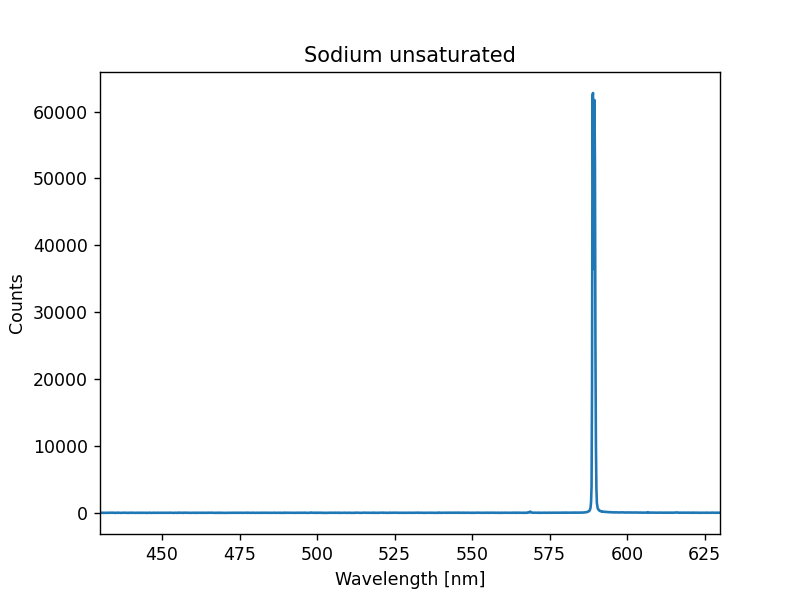

Text(0, 0.5, 'Counts')

In [7]:
# Specify the absolute path for the unsaturated sodium spectrum inside quotation marks:
df = pd.read_csv("C:/Users/LENOVO/PycharmProjects/scientific_computations/files/sodium unsaturated.txt",
                 sep=";",  # Here we specify that values are seperated by semicolons.
                 header=0,
                 # This skips the first rows of the file containing information about the acquisiton settings

                 # Check if your spectrum txt file contains of 4 or 5 coulumns. If you have 4 coulumns use the adapted 'names'-array the line below.
                 # names=["Wavelength", "Count sample", "Background", "Reference"])
                 names=["Wave", "Sample", "Dark", "Reference"])

# df = df.stack().str.replace(',', '.').unstack()  # Turns the  ',' in the data frame to a point
data = df.to_numpy()  #Converts the data frame into an Numpy array
wavelength = np.array(list(data[:, 0]), dtype=float)  #Turns the Numpy 2d array in a regular 2D float array
counts = np.array(list(data[:, 1]),
                  dtype=float)  # If you have saved 5 coulumns, use the 'Corrected for dark values' by changing the '1' to a '4'.
plt.figure()
plt.plot(wavelength, counts)
plt.show()
plt.title("Sodium unsaturated")  # set title of the plot
plt.xlabel("Wavelength [nm]")  # set label for x-axis
plt.xlim(430, 630)  # set range for x-axis
plt.ylabel("Counts")  # set label for Y-axis

Fit a Gaussian function on the unsaturated data to extract the wavelength of the intense feature in the spectrum.

<IPython.core.display.Javascript object>


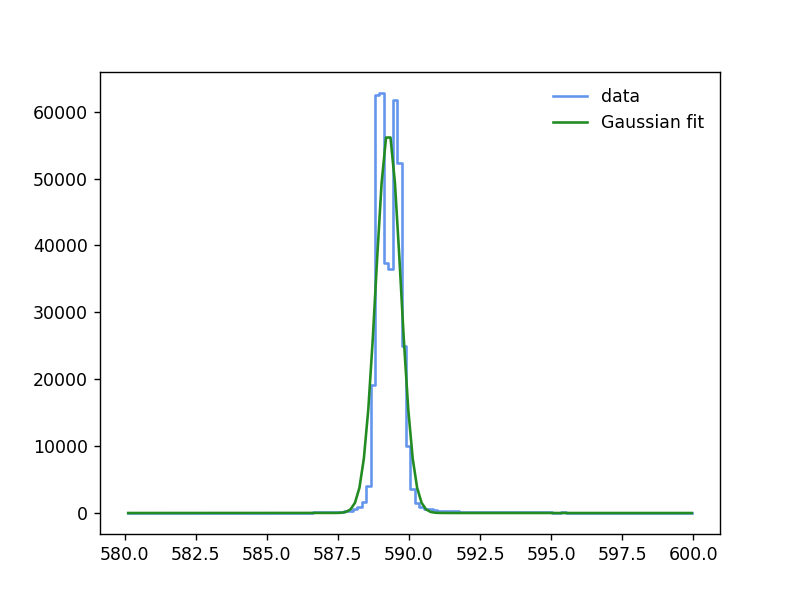

Estimated parameters:
 A = 57035.73237, mu = 589.27220,  sigma = 0.43514 

Uncertainties in the estimated parameters: 
 σ²(A) = 5221495.86599, σ²(mu) = 0.00041, σ²(sigma) = 0.00041 

Covariance matrix: 
 [[ 5.22149587e+06 -5.73038572e-03 -2.65658176e+01]
 [-5.73038572e-03  4.05448748e-04  2.77470580e-07]
 [-2.65658176e+01  2.77470580e-07  4.05558508e-04]]


In [8]:
peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength,
                                              y=counts,
                                              region_start=580,  # bins where to start fitting
                                              region_stop=600,  # bins where to stop fitting
                                              mu_guess=589,  # guess for the position of peak centroid
                                              A_guess=60000,  # guess for the amplitude of the peak
                                              sigma_guess=1)  # guess for the sigma

## 2.2 Open a saturated spectrum <a name="quantum_2"></a>
Identify all the small peaks, which are otherwise hidden in the noise. Again try to find all transitions for which n = 3 is the lower energy level and enter the values in the provided table Fill below under section [2.3](#quantum_3).


<IPython.core.display.Javascript object>


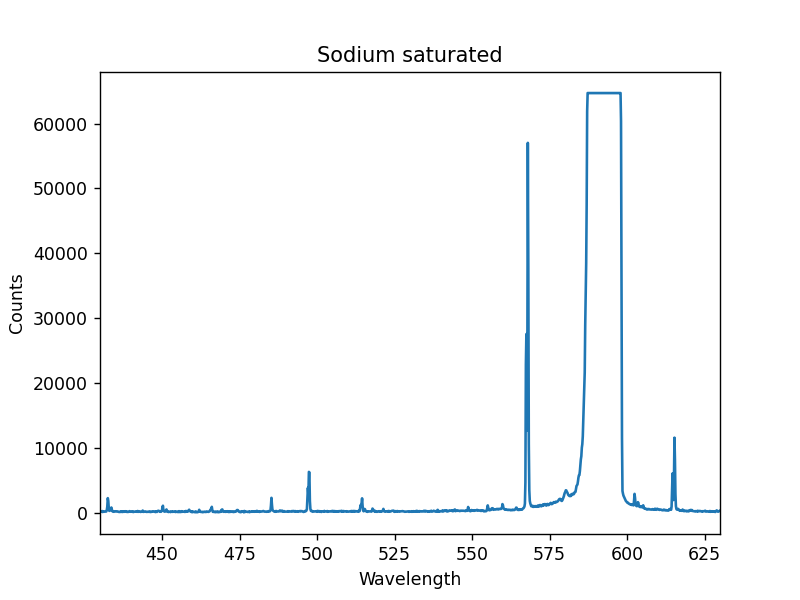

Text(0, 0.5, 'Counts')

In [9]:
# Specify the absolute path for the saturated sodium spectrum inside quotation marks:
df = pd.read_csv("C:/Users/LENOVO/PycharmProjects/scientific_computations/files/sodium saturated 2.txt",
                 sep=";",  # Here we specify that values are seperated by semicolons.
                 header=0,  # This skips the first rows of the file containing information about the acquisiton settings

                 # Check if your spectrum txt file contains of 4 or 5 coulumns. If you have 4 coulumns use the adapted 'names'-array the line below.
                 # names=["Wavelength", "Count sample", "Background", "Reference"])
                 names=["Wave", "Sample", "Dark", "Reference"])

# df = df.stack().str.replace(',', '.').unstack()  # Turns the  ',' in the data frame to a point
data = df.to_numpy()  #Converts the data frame into an Numpy array
wavelength = np.array(list(data[:, 0]), dtype=float)  #Turns the Numpy 2d array in a regular 2D float array
counts = np.array(list(data[:, 1]),
                  dtype=float)  # If you have saved 5 coulumns, use the 'Corrected for dark values' by changing the '1' to a '4'.

plt.figure()
plt.plot(wavelength, counts)
plt.show()
plt.title("Sodium saturated")  # set title of the plot
plt.xlabel("Wavelength")  # set label for x-axis
plt.xlim(430, 630)  # set range for x-axis
plt.ylabel("Counts")  # set label for Y-axis

Analogue to the previous tasks, a Gaussian fit is used to determine the central wavelength of the features in the spectrum.
Fill in your results in the table below under section [2.3](#quantum_3).

<IPython.core.display.Javascript object>


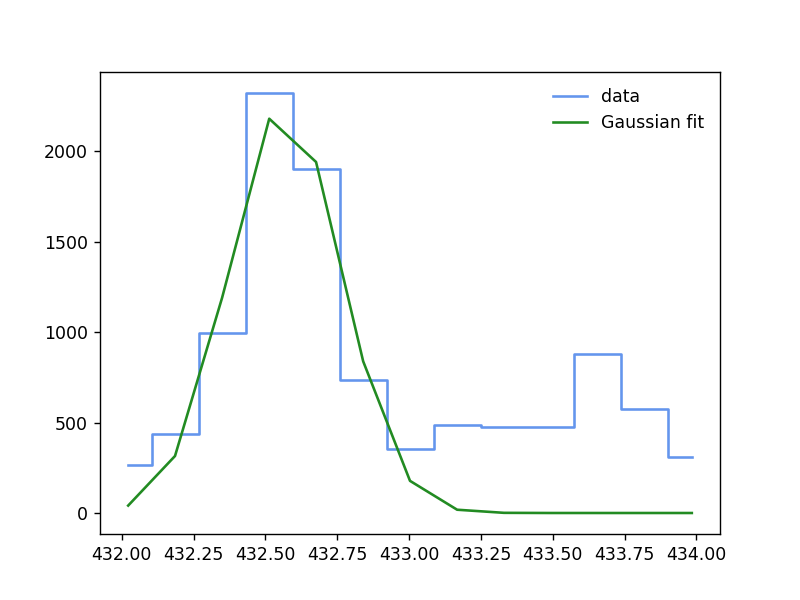

Estimated parameters:
 A = 2271.96552, mu = 432.56800,  sigma = 0.19271 

Uncertainties in the estimated parameters: 
 σ²(A) = 146023.97507, σ²(mu) = 0.00141, σ²(sigma) = 0.00140 

Covariance matrix: 
 [[ 1.46023975e+05 -6.52789689e-03 -8.24803819e+00]
 [-6.52789689e-03  1.40764341e-03 -5.85488403e-07]
 [-8.24803819e+00 -5.85488403e-07  1.40320804e-03]]


In [10]:
peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength,
                                              y=counts,
                                              region_start=432,  # bins where to start fitting
                                              region_stop=434,  # bins where to stop fitting
                                              mu_guess=433,  # guess for the position of peak centroid
                                              A_guess=6000,  # guess for the amplitude of the peak
                                              sigma_guess=1)  # guess for the sigma

## 2.3 Calculate experimental values for the quantum defect <a name="quantum_3"></a>
Intentify the transistion, for which n=3 is the lower energy level, using the [NIST data base](https://physics.nist.gov/PhysRefData/ASD/lines_form.html).
<br>
Calculate experimental values for the quantum defect $\delta=n-n^{*}$. Find more information about the formula as well as the exact values for the constants in your textbooks, for example: *Foot, C. J. Atomic Physics. Oxford: Oxford University Press, 2005*  or   *A. Thorne, U. Litzén, S. Johansson. Spectrophysics: Principles and Applications. Media-Tryck Lund, 2007.*


In [11]:
### Enter your results in the arrays below:
sodium_wavelength = ([432.56800, 450.23723, 465.91894, 474.19472, 497.37418, 514.44520, 567.94662, 587.66411])
sodium_upperlevel = (["10s", "7d", "6d", "7s", "5d", "6s", "4d", "3p"])
sodium_lowerlevel = (["3p", "3p", "3p", "3p", "3p", "3p", "3p", "3s"])

pd.DataFrame([sodium_wavelength, sodium_upperlevel, sodium_lowerlevel],
             columns=['1', '2', '3', '4', '5', '6', '7', '8'],
             index=['Wavelength / nm', 'Upper level', 'Lower level'])

,1,2,3,4,5,6,7,8
Wavelength / nm,432.568,450.23723,465.91894,474.19472,497.37418,514.4452,567.94662,587.66411
Upper level,10s,7d,6d,7s,5d,6s,4d,3p
Lower level,3p,3p,3p,3p,3p,3p,3p,3s


Use the field below to develop your own code  to calculate the experimental value for the quantum defect. Take the values over into the result table below.

In [3]:
energies = [-5.13907696, -3.029280806472383]
h = 6.62607015e-34
c = 299792458
e = 1.602176634e-19

def quantum_defect(n, energy, wavelength):
    E = energy + ((h * c / wavelength) / e)
    print(E)
    return n - np.sqrt(-13.605571912345525 / E)

# print(quantum_defect(3, energies[0], 587.66411e-9)) # 3p orbital
print(quantum_defect(7, energies[1], 450.23723e-9))

-0.2755281140706405
-0.02708879375924589


In [14]:
### Enter your results in the result table below:
Quantum_defect_exp = ([0.865, -0.027, -0.079, 1.272, -0.036, 1.313, -0.097, 0.881])
Quantum_defect_lit = ([0.843, 0.009, 0.011, 1.348, 0.013, 1.349, 0.011, 0.883])

pd.DataFrame([sodium_wavelength, sodium_upperlevel, sodium_lowerlevel, Quantum_defect_exp, Quantum_defect_lit],
             columns=['1', '2', '3', '4', '5', '6', '7', '8'],
             index=['Wavelength / nm', 'Upper level', 'Lower level', 'Calculated quantum defect',
                    'Literature quantum defect'])

,1,2,3,4,5,6,7,8
Wavelength / nm,432.568,450.23723,465.91894,474.19472,497.37418,514.4452,567.94662,587.66411
Upper level,10s,7d,6d,7s,5d,6s,4d,3p
Lower level,3p,3p,3p,3p,3p,3p,3p,3s
Calculated quantum defect,0.865,-0.027,-0.079,1.272,-0.036,1.313,-0.097,0.881
Literature quantum defect,0.843,0.009,0.011,1.348,0.013,1.349,0.011,0.883


$\lambda=\frac{hc}{E_{3p}-E_{8d}}$, where $E_{3p}=-\frac{13.6\text{eV}}{(3-\delta_p)^2}$ and $E_{8d}=-\frac{13.6\text{eV}}{(8-\delta_d)^2}$

Use the empty code box below to write your own code to calculate the vacuum wavelength:

In [15]:
Ep = 13.605571912345525 / (3 - 0.883) ** 2
Ed = 13.605571912345525 / (8 - 0.01) ** 2

def vac_wavelength():
    return (h * c) / ((Ep - Ed) * e)

print("Vacuum wavelength =", vac_wavelength() * 1e9, "nm")

Vacuum wavelength = 439.2406692760937 nm


## 2.5 Discussion <a name="quantum_5"></a>
Discuss your results. Comment, in particular, on the internal order of the energy levels corresponding to different orbitals, and on the underlying physics.Descripe the procedure used for the experimental determination of the quantum defects and the vacuum wavelength for the transition 3p – 8d in sodium, together with the actual calculations. Compare the experimentally determined quantum defects with the ones calculated from the tabulated energy levels.

In this Task, two Sodium spectra were collected. The first was unsaturated that resolves the double line as seen in Figure above, similarly done as for that of Hydrogen, and the second was saturated, the amount of light allowed to reach the spectrometer was increased and a higher resolving channel was used. This was done in order to see weaker peaks instead of the double line at a wavelength of around $570$ as seen in the second figure. The peaks were then collected and their corresponding transitions were deduced as seen in the table above.

From this we can also observe the internal order of the energy levels and their orbitals, since a higher wavelength corresponds to a lower energy. Observing the table we can deduce that the higher the difference between the quantum numbers $n$, the lower the wavelength and thus the higher the energy of the photon. While this holds true, we can also note that the orbital quantum number $l$, has the following order in terms of increasing energy: $s,p,d,...$. This results in the overall internal order of the energy levels corresponding to different orbitals: $1s2s2p3s3p4s3d4p5s4d5p6s4f...$ according to the aufbau principle.

Orbital energy of Hydrogen like atoms is mainly found by $n$, as all $l$ levels with the same $n$ are degenerate (same energy). Each successively higher $n$ results in higher energy, and the difference of energy decreases as $n$ increases. Multiple electron atoms are influenced by the interactions between electrons, so that energy levels depend on both $n$ and $l$. As we can see in the table the $6d$ orbital is higher in energy than the $7s$ orbital. This occurs because when for instance the $l=2$ subshell is filled, the increase in energy has such an effect that it propels the orbital energy above that of the $s$ orbital in the next higher $n$. When $l=3$ is filled, it is propelled two steps higher, and so on successively.

The quantum defect was then calculated using the equation seen in $2.3$, which was then compared to the theoretical values calculated from Foot $\delta=n-n^{*}$, where $n^{*}=\sqrt(13.6/IE)$ and the ionisation energy IE was found for each level. We observe that the quantum defect decreases with increasing quantum number $l$, as for $d$ the quantum defect is close to zero, since these orbital energies are similar to hydrogen. Comparing the experimental values to the theoretical values, it can be observed that the experimental quantum defect for $s$ orbitals are very close to those given in theory but that was not the case with the $d$ orbitals. Since the expected values of the quantum defect for $d$-orbitals is very small(close to zero), it might be that python reaches its computational limit and thus goes past zero. This might be the reason, but it was not certain.

The vacuum wavelength was calculated according to the formula in $2.4$, using the energies of the involved levels obtained when computing the quantum defect. The estimated vacuum wavelength is very close to the one given by NIST database.

--------------------------------------------------------------------------------------------------------------
# <span style="color:orange">3. Fine structure</span> <a name="fine_structure"></a>
## 3.1 Open file and identify peaks <a name="fine_structure_1"></a>
In this last part you are supposed to conduct more of the analysis on your own. Try to modify the code in order to extract peak height and position.

<IPython.core.display.Javascript object>


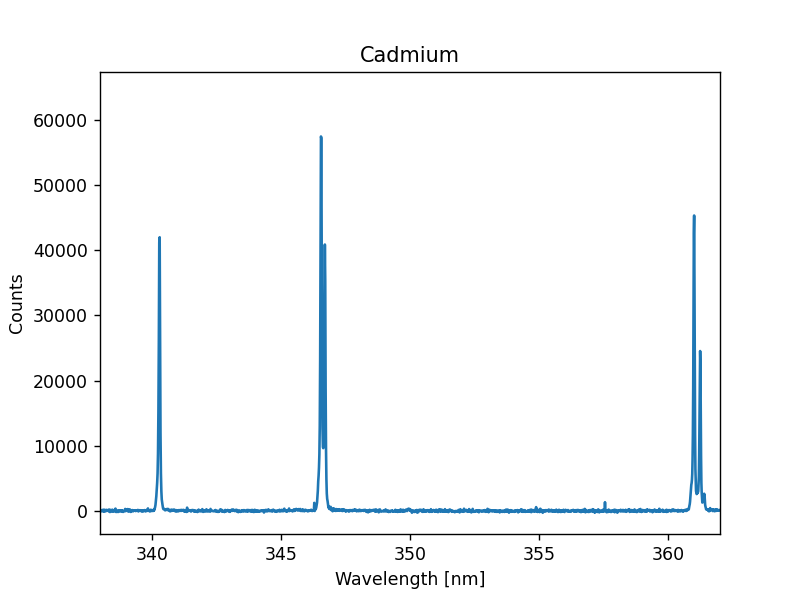

Text(0, 0.5, 'Counts')

In [16]:
# Specify the absolute path for the cadmium spectrum inside quotation marks:
df = pd.read_csv("C:/Users/LENOVO/PycharmProjects/scientific_computations/files/cadmium saturated.txt",
                 sep=";",  # Here we specify that values are seperated by semicolons.
                 header=0,  # This skips the first rows of the file containing information about the acquisiton settings

                 # Check if your spectrum txt file contains of 4 or 5 coulumns. If you have 4 coulumns use the adapted 'names'-array the line below.
                 # names=["Wavelength", "Count sample", "Background", "Reference"])
                 names=["Wave", "Sample", "Dark", "Reference"])

# df = df.stack().str.replace(',', '.').unstack()  # Turns the  ',' in the data frame to a point
data = df.to_numpy()  #Converts the data frame into an Numpy array
wavelength = np.array(list(data[:, 0]), dtype=float)  #Turns the Numpy 2d array in a regular 2D float array
counts = np.array(list(data[:, 1]),
                  dtype=float)  # If you have saved 5 coulumns, use the 'Corrected for dark values' by changing the '1' to a '4'.

plt.figure()
plt.plot(wavelength, counts)
plt.show()
plt.title("Cadmium")  # set title of the plot
plt.xlabel("Wavelength [nm]")  # set label for x-axis
plt.xlim(338, 362)  # set range for x-axis
plt.ylabel("Counts")  # set label for Y-axis

<IPython.core.display.Javascript object>


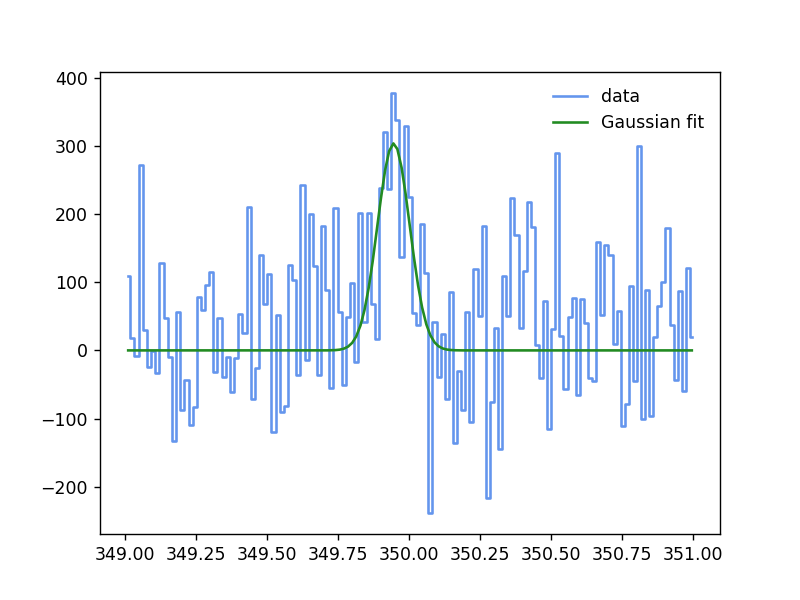

Estimated parameters:
 A = 303.68142, mu = 349.94566,  sigma = 0.05666 

Uncertainties in the estimated parameters: 
 σ²(A) = 2531.78990, σ²(mu) = 0.00012, σ²(sigma) = 0.00012 

Covariance matrix: 
 [[ 2.53178990e+03  4.56755053e-05 -3.14992284e-01]
 [ 4.56755053e-05  1.17546872e-04 -1.24890396e-08]
 [-3.14992284e-01 -1.24890396e-08  1.17561078e-04]]


In [17]:
peak1 = fittingFunctions.perform_Gaussian_fit(x=wavelength,
                                              y=counts,
                                              region_start=349,  # bins where to start fitting
                                              region_stop=351,  # bins where to stop fitting
                                              mu_guess=349.8,  # guess for the position of peak centroid
                                              A_guess=45000,  # guess for the amplitude of the peak
                                              sigma_guess=1)  # guess for the sigma

In [18]:
### Write your results here. Mind that you need to extract the peak height as well.
Cadmium_wavelength = ([340.30, 346.56, 346.70, 349.94, 360.99, 361.23, 361.38])
Cadmium_Intensity = ([41274.46, 56240.68, 38875.17, 347, 43166.38, 23559.86, 2485.78])

pd.DataFrame([Cadmium_wavelength, Cadmium_Intensity], columns=['1', '2', '3', '4', '5', '6', '7'],
             index=['Wavelength / nm', 'Intensity'])

,1,2,3,4,5,6,7
Wavelength / nm,340.30,346.56,346.70,349.94,360.99,361.23,361.38
Intensity,41274.46,56240.68,38875.17,347.00,43166.38,23559.86,2485.78


## 3.2 Conduct the analysis <a name="fine_structure_2"></a>
  * Determine the vacuum wavelengths of as many lines as possible in the wavelength range 340-362 nm of your collected spectra.
 <br>
  * Identify the cadmium transitions corresponding to the different spectral lines and make sure that you find a multiplet with in total six transitions. (done)
 <br>
  * Determine the relative intensities of the six lines in the multiplet. (done) <br>
  * Determine the relative energies of the fine structure levels of the two involved triplets
<br><br>
Use the empty code box below to write your own code. Create a table for all the identified spectral lines including the vacuum wavelengths, the energy levels involved in the transitions and the relative intensities of the transitions(done). Additionally present the relative energies of the fine structure levels of the two involved triplets. Include a sketch of the energy level diagram where the identified transitions are marked (Images can be imported under the 'Insert' tab above).



![title](cadmium_transitions.png)

In [19]:
upper_level = ["5d 3D1", "5d 3D_2", "5d 3D_1", "5d 3D_2", "5d 3D_3", "5d 3D_2", "5d 3D_1"]
lower_level = ['$5p 3P_0$', '$5p 3P_1$', '$5p 3P_1$', '$5d 3P_1$', '$5p 3P_2$', '$5p 3P_2$', '$5p 3P_2$']
rel_energies = [29371.78, 28841.78, 28829.68, 28563.65, 27689.03, 27670.92, 27658.82]
pd.DataFrame([Cadmium_wavelength, Cadmium_Intensity, upper_level, lower_level, rel_energies],
             columns=['1', '2', '3', '4', '5', '6', '7'],
             index=['Wavelength / nm', 'Relative intensity', 'Upper level', 'Lower level', 'Relative energy / cm^-1'])

,1,2,3,4,5,6,7
Wavelength / nm,340.3,346.56,346.7,349.94,360.99,361.23,361.38
Relative intensity,41274.46,56240.68,38875.17,347,43166.38,23559.86,2485.78
Upper level,5d 3D1,5d 3D_2,5d 3D_1,5d 3D_2,5d 3D_3,5d 3D_2,5d 3D_1
Lower level,$5p 3P_0$,$5p 3P_1$,$5p 3P_1$,$5d 3P_1$,$5p 3P_2$,$5p 3P_2$,$5p 3P_2$
Relative energy / cm^-1,29371.78,28841.78,28829.68,28563.65,27689.03,27670.92,27658.82


## 3.3 Discussion<a name="fine_structure_3"></a>
Discuss briefly all the figures, tables and diagrams and answer to the following questions:
  * Is the fine structure of the studied terms in agreement with the Landé interval rule. If not, what is a possible reason for this?
<br>
  * Do the relative intensities  fulfill the sum rule for multiplets? If not, what is a possible reason for this?
 <br>
  * The hardly visible line around 350 nm correspond to a transition between a triplet and a singlet, which is not allowed in the LS coupling scheme. What transition is this, and why is it at all visible?
 <br>

The figure obtained in part 3.1 shows the recorded emission spectrum of cadmium lamp measured between 338nm and 362nm wavelength which correspond to the transitions of electron(s) between the fine structure of cadmium in its first two excited states, ie 5s5d and 5s5p levels. There are six significant transitions shown in the figure as peaks which correspond to electron jump between the triplet D and the triplet P sub-levels. After an extensive and thorough analysis, it was observed that at 350nm wavelength, there exist a small peak in the spectrum which correspond to the transition between the singlet D and the triplet P. This transition is forbidden based on the theory of LS-coupling and can only be explained by considering that cadmium atoms are relatively large hence the LS-coupling scheme is not good enough as it mixes the wavefunctions of the singlet D and the triplet P involved due to increased energy of interaction among its many electrons. This also accounts for the very weak intensity recorded during the experiment. It was also observed that at the wavelength of around 357nm there is a peak with a significant intensity which was unpredictable. The cause of this peak might be due to the presence of impurity in the cadmium lamp or oxidation of cadmium when in contact with air.

The table obtained in part 3.1 shows the measured wavelengths with their respective intensities while the table in part 3.2 shows the same thing but with the addition of the upper and lower energy levels involved as well as their relative energy differences. With these data, it was verified that transitions in cadmium fine structure obeys Landé interval rule. This was done by finding the energy ratio between two successive energy levels in the triplets involved and compare that to their respective J quantum numbers. For example the energy ratio among the triplets of P is 2.16 and the ratio of the J quantum number is 2. Since Landé  interval rule holds here, it shows that LS-coupling scheme can be used to account for the spin-orbit interaction in cadmium although the atoms themselves are comparatively large. Unlike the Landé interval rule, the sum rule for multiplets is not obeyed here, the ratio of the sums of the intensities between levels does not match that between their degeneracies. It was found that the triplets with the degeneracy of 3 have their sums of intensities greater than the triplets with degeneracy of 5.